Task 3: Annual Exports and Imports Analysis from NO2 to DE_LU (2019 onward)

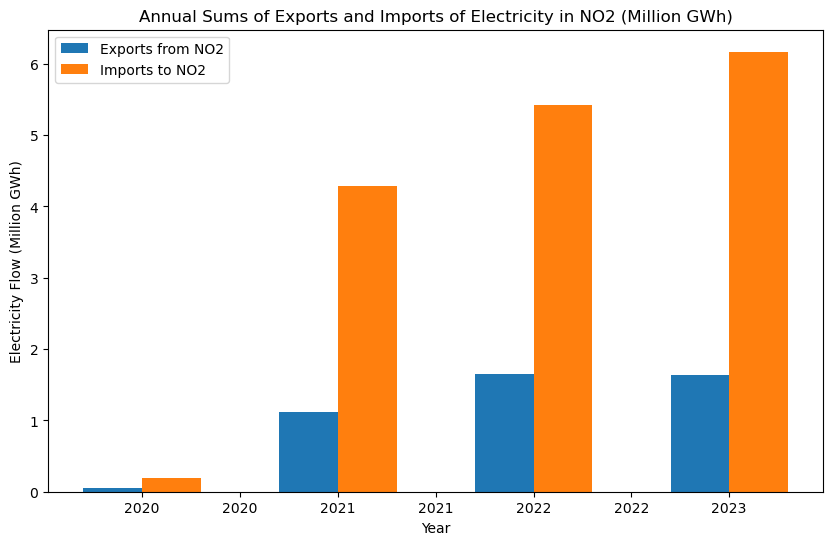

Conclusion:
NO2 has generally imported more electricity from Germany over the analyzed period, with a total import of 16.07 million GWh compared to 4.45 million GWh exported.

Annual Summary of Exports and Imports (Million GWh):
FlowType    Export    Import
Year                        
2020      0.050340  0.194240
2021      1.117788  4.287291
2022      1.643756  5.423627
2023      1.637431  6.169167


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Define the path to the data folder and pattern for CSV files
folder_path = '/Users/jsalexander/Repos/TermPaper/group-term-paper/data/PhysicalFlows_12.1.G'
file_pattern = os.path.join(folder_path, "*_PhysicalFlows_12.1.G.csv")

# Load all matching files and concatenate them into a single DataFrame
all_files = glob.glob(file_pattern)
dataframes = [pd.read_csv(file, delimiter='\t', parse_dates=['DateTime']) for file in all_files]
data = pd.concat(dataframes, ignore_index=True)

# Standardize column names for consistency
data.columns = ['DateTime', 'InMapCode', 'OutMapCode', 'FlowValue']

# Fill any missing values in 'FlowValue' with zero
data['FlowValue'] = data['FlowValue'].fillna(0)

# Filter data for relevant electricity flows between NO2 and DE_LU for all years
data['Year'] = data['DateTime'].dt.year
filtered_data = data.loc[
    ((data['InMapCode'] == 'NO2') & (data['OutMapCode'] == 'DE_LU')) |
    ((data['InMapCode'] == 'DE_LU') & (data['OutMapCode'] == 'NO2'))
].copy()

# Define flow type based on the direction of flow
filtered_data['FlowType'] = np.where(
    filtered_data['OutMapCode'] == 'DE_LU', 'Export', 'Import'
)

# Convert FlowValue to millions of GWh
filtered_data['FlowValue'] = filtered_data['FlowValue'] / 1_000_000

# Group by 'Year' and 'FlowType' to calculate annual sums of exports and imports
annual_flows = filtered_data.groupby(['Year', 'FlowType'])['FlowValue'].sum().unstack(fill_value=0)

# Set up the bar plot for annual exports and imports
plt.figure(figsize=(10, 6))
plt.bar(annual_flows.index - 0.15, annual_flows['Export'], width=0.3, label='Exports from NO2')
plt.bar(annual_flows.index + 0.15, annual_flows['Import'], width=0.3, label='Imports to NO2')

# Add title, labels, and legend
plt.title('Annual Sums of Exports and Imports of Electricity in NO2 (Million GWh)')
plt.xlabel('Year')
plt.ylabel('Electricity Flow (Million GWh)')
plt.legend()

# Format y-axis with commas for readability and ensure x-axis labels are clean integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Save the plot as specified
plt.savefig('figure_task3.png', format='png')
plt.show()

# Optional: Detailed Summary and Conclusion
print("Conclusion:")
total_exports = annual_flows['Export'].sum()
total_imports = annual_flows['Import'].sum()

if total_exports > total_imports:
    print(f"NO2 has generally exported more electricity to Germany over the analyzed period, with a total export of {total_exports:,.2f} million GWh compared to {total_imports:,.2f} million GWh imported.")
else:
    print(f"NO2 has generally imported more electricity from Germany over the analyzed period, with a total import of {total_imports:,.2f} million GWh compared to {total_exports:,.2f} million GWh exported.")

# Display an annual summary of exports and imports in millions of GWh
print("\nAnnual Summary of Exports and Imports (Million GWh):")
print(annual_flows)


Write that it is so low in 2020 because nordlink opened in  the end